Pytanie badawcze:

1. Descriptive analysis + data visualization (exploratory data analysis),
2. Classification along with detailed accuracy assessment,

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [3]:
Data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# EDA

In [11]:
Data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## NaNs

In [29]:
np.sum(Data.isna())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


{'3721.9',
 '3131.55',
 '8331.95',
 '2157.5',
 '1329.2',
 '2429.1',
 '1868.4',
 '428.45',
 '2020.9',
 '1517.5',
 '597.9',
 '7195.35',
 '43.3',
 '4259.3',
 '457.3',
 '2470.1',
 '770.5',
 '1643.55',
 '934.15',
 '7246.15',
 '1440.75',
 '7511.3',
 '6441.85',
 '1071.6',
 '5165.7',
 '6126.15',
 '6747.35',
 '432.5',
 '1341.5',
 '893',
 '1931.3',
 '1604.5',
 '4230.25',
 '267.6',
 '5229.45',
 '1654.6',
 '5232.9',
 '76.45',
 '233.9',
 '2200.7',
 '3055.5',
 '154.55',
 '2861.45',
 '3990.6',
 '1483.25',
 '5861.75',
 '4116.8',
 '362.6',
 '4671.7',
 '2209.75',
 '641.35',
 '871.4',
 '616.9',
 '5265.2',
 '7238.6',
 '5860.7',
 '2419',
 '3791.6',
 '7251.7',
 '1992.85',
 '1698.55',
 '240.45',
 '2727.3',
 '179.35',
 '981.45',
 '6786.4',
 '527.5',
 '864.85',
 '1622.45',
 '3019.1',
 '6536.5',
 '546.95',
 '6339.45',
 '328.95',
 '201.1',
 '1218.45',
 '4630.2',
 '2440.25',
 '5625.55',
 '45.15',
 '181.6',
 '81.1',
 '4014.2',
 '1046.5',
 '6042.7',
 '1468.75',
 '3554.6',
 '1090.1',
 '2438.6',
 '680.05',
 '391.7',


In [10]:
Data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
Data[['MonthlyCharges', 'tenure', 'TotalCharges']]

,MonthlyCharges,tenure,TotalCharges
0,29.85,1,29.85
1,56.95,34,1889.5
2,53.85,2,108.15
3,42.30,45,1840.75
4,70.70,2,151.65
...,...,...,...
7038,84.80,24,1990.5
7039,103.20,72,7362.9
7040,29.60,11,346.45
7041,74.40,4,306.6


In [9]:
from scipy.stats import pearsonr

In [10]:
pearsonr(Data.MonthlyCharges * Data.tenure, Data.TotalCharges)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [40]:
Data.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


(array([7.34630129, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 2.65369871]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

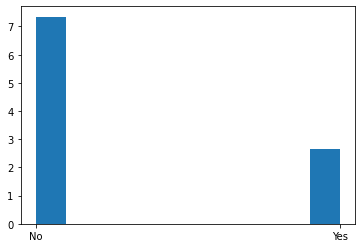

In [4]:
plt.hist(Data.Churn, density=True)

(array([2421.,    0.,    0.,    0.,    0., 3096.,    0.,    0.,    0.,
        1526.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

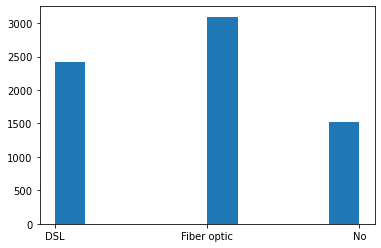

In [21]:
plt.hist(Data.InternetService)